In [14]:
def prep_store_data(df):
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    # make sure we sort by date/time before resampling or doing other time series manipulations
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['sales_total'] = df.quantity * df.item_price
    return df

In [15]:
import pandas as pd
import numpy as np


In [16]:
import acquire as a

In [17]:
endpoint_items = '/api/v1/items'
target_items = 'items'

endpoint_stores = '/api/v1/stores'
target_stores = 'stores'

endpoint_sales = '/api/v1/sales'
target_sales = 'sales'

In [18]:
domain = 'https://python.zgulde.net'

In [19]:
df = a.acquire_merge_dfs()

Using cached csv
Using cached csv
Using cached csv


In [20]:
df = prep_store_data(df)

In [22]:
# Split
train = df[:'2016']
test = df['2017']

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_5155/1025816190.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [24]:
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,2013,294.00


In [25]:
y = df.sales_total

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

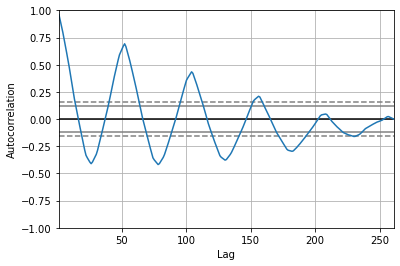

In [27]:
pd.plotting.autocorrelation_plot(y.resample('W').mean())

In [28]:
y = y.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-79.093974,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-82.822344,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-83.626435,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-84.095204,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-82.120101,NaN


<AxesSubplot:xlabel='sale_date'>

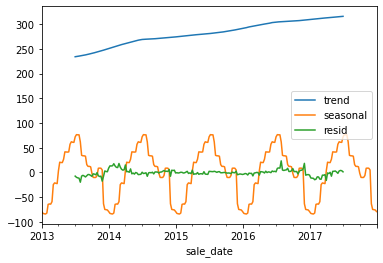

In [29]:
decomposition.iloc[:, 1:].plot()


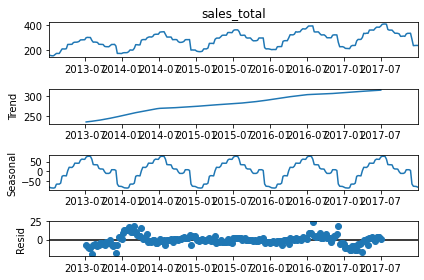

In [32]:
result.plot()
None